## Import Dependencies

1. Pandas for data analysis
2. Matplotlib for visuals
3. Scipy for statistical analysis

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## Import and Clean Data

### Gini Coefficient Data

In [75]:
income_data = pd.read_csv("raw_data/income_Distribution_OECD_013021.csv")
income_data.head()

C:\Users\berry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.326,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.337,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.330,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.325,NaN,NaN
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2004,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.315,NaN,NaN


### Union Density Data

In [76]:
union_df = pd.read_csv("raw_data/uniondata.csv")
union_df.head()

,Unnamed: 0,Country,Source,Series,Year,Unit,Value
0,54,Hungary,Survey data,Trade union density,2004,Percentage,16.8
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9
2,56,Hungary,Survey data,Trade union density,2015,Percentage,9.0
3,94,Poland,Administrative data,Trade union density,1999,Percentage,29.1
4,95,Poland,Administrative data,Trade union density,2000,Percentage,24.7


### Gini Coefficient Data

In [77]:
gini_cpi_df = pd.read_csv("raw_data/gini_cpi.csv")
gini_cpi_df.head()

,Unnamed: 0,Country,MEASURE,Age group,Year,Unit Code,Unit,Value
0,0,Australia,GINI,Total population,2012,0_TO_1,0-1 scale,0.326
1,1,Australia,GINI,Total population,2014,0_TO_1,0-1 scale,0.337
2,2,Australia,GINI,Total population,2016,0_TO_1,0-1 scale,0.330
3,3,Australia,GINI,Total population,2018,0_TO_1,0-1 scale,0.325
4,6,Australia,GINI,Total population,2010,0_TO_1,0-1 scale,0.334


### Merge dataframes
- Filter for 2009 to 2018
    - union_df includes 21 years, from 1998 to 2018
    - gini_cpi_df includes 11 years, from 2009 to 2019

In [78]:
df = pd.merge(union_df, gini_cpi_df, on=["Country", "Year"], suffixes=("_union", "_gini_cpi"))
df.head()

,Unnamed: 0_union,Country,Source,Series,Year,Unit_union,Value_union,Unnamed: 0_gini_cpi,MEASURE,Age group,Unit Code,Unit_gini_cpi,Value_gini_cpi
0,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7947,GINI,Total population,0_TO_1,0-1 scale,0.241000
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7959,GINI,Total population,0_TO_1,0-1 scale,0.272000
2,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7964,CPI2010,Total population,IDX,Index,95.369304
3,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7976,CPI2010,Total population,IDX,Index,95.369304
4,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,29555,GINI,Working age population: 18-65,0_TO_1,0-1 scale,0.245000


### Remove unrelated columns

In [79]:
df_09_18 = df[["Country", "Year", "Value_union", "MEASURE", "Age group", "Value_gini_cpi"]]
df_09_18.head()

,Country,Year,Value_union,MEASURE,Age group,Value_gini_cpi
0,Hungary,2009,11.9,GINI,Total population,0.241000
1,Hungary,2009,11.9,GINI,Total population,0.272000
2,Hungary,2009,11.9,CPI2010,Total population,95.369304
3,Hungary,2009,11.9,CPI2010,Total population,95.369304
4,Hungary,2009,11.9,GINI,Working age population: 18-65,0.245000


### Filter for Working Age Population: 18~65

In [80]:
working_age = df_09_18[df_09_18["Age group"] == "Working age population: 18-65"]

gini_working = working_age[working_age["MEASURE"] == "GINI"]
gini_working = gini_working.drop_duplicates(subset=["Country","Year"])

cpi_working = working_age[working_age["MEASURE"] != "GINI"]
cpi_working = cpi_working.drop_duplicates(subset=["Country","Year"])

# Merge two dfs: gigi_working, cpi_working
# Drop unrelated columns
data_working = pd.merge(gini_working, cpi_working, on=["Country", "Year"])\
                        .drop(columns=["MEASURE_x", "Age group_x", "Value_union_y", "MEASURE_y", "Age group_y"])
# Rename columns 
data_working = data_working.rename(columns = {
                                                "Value_union_x": "Union %",
                                                "Value_gini_cpi_x": "Gini",
                                                "Value_gini_cpi_y": "CPI"
                                            })
data_working

data_working.to_csv("output/data_working.csv")

In [81]:
data_working

,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.245,95.369304
1,Hungary,2015,9.0,0.291,111.384411
2,Poland,2009,16.3,0.305,97.484226
3,Poland,2010,18.3,0.307,100.000000
4,Poland,2011,17.0,0.304,104.239401
...,...,...,...,...,...
269,United States,2013,10.8,0.392,106.833852
270,United States,2014,10.7,0.389,108.566940
271,United States,2015,10.6,0.384,108.695723
272,United States,2016,10.3,0.385,110.067028


## Group countries by Regions
- Western (Western Europe, Israel, Australia, New Zealand, Canada)
- Eastern Europe
- Scandinavia
- US
- East Asia
- Latin America

In [83]:
west = ['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 'Italy', 'Luxembourg', 
        'Greece', 'Israel', 'Netherlands', 'Belgium', 'Australia', 'New Zealand', 'Portugal', 'Turkey', 'Canada']
east =  ['Estonia', 'Czech Republic', 'Latvia', 'Lithuania', 'Hungary', 'Slovak Republic', 'Slovenia', 'Poland'] 
scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']
us = ['United States']
asia = ['Korea', 'Japan']
latin = ['Mexico', 'Chile']

In [84]:
regions = {
    "West": west,
    "East": east,
    "Scandinavia": scandinavian,
    "US": us,
    "Asia": asia,
    "Latin": latin
}
working = data_working
working["Region"] = ""
for index, row in working.iterrows():
    for region in regions:
        if row.Country in regions[region]: 
            working.loc[index, "Region"] = region
            break
            
working.head()

,Country,Year,Union %,Gini,CPI,Region
0,Hungary,2009,11.9,0.245,95.369304,East
1,Hungary,2015,9.0,0.291,111.384411,East
2,Poland,2009,16.3,0.305,97.484226,East
3,Poland,2010,18.3,0.307,100.000000,East
4,Poland,2011,17.0,0.304,104.239401,East


In [85]:
def plot_groupby(df, x, y, by, kind):
    is_setting_xlim, is_setting_ylim = True, True
    try:
        x_max = df[x].max()*1.05
        x_min = df[x].min()*0.95
    except:
        is_setting_xlim = False
        
    try:
        y_max = df[y].max()*1.05
        y_min = df[y].min()*0.95
    except:
        is_setting_ylim = False
        
    fig, ax = plt.subplots(3, 2, figsize=(20, 35))
    i = 0
    for member in df[by].value_counts().index:
        data_by = df[df[by] == member]
        current_ax = ax[i // 2][i % 2]
        
        if kind == "scatter":
            data_by.plot.scatter(x=x, y=y, ax=current_ax, grid=True)
        if kind == "hist":
            data_by.plot.hist(ax=current_ax)
        if kind == "bar":
            data_by.plot.bar(x=x, y=y,ax=current_ax)
            
        current_ax.set_title(f"{member}")
        if is_setting_xlim: current_ax.set_xlim(x_min, x_max)
        if is_setting_ylim: current_ax.set_ylim(y_min, y_max)

        i += 1
    

In [86]:
# plot_groupby(working, x="Year", y="Gini", by="Region", kind="bar")

In [88]:
west_df = pd.DataFrame({"Country": west})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

In [89]:
west_filter = pd.merge(data_working, west_df, on=["Country"])
east_filter = pd.merge(data_working, east_df, on=["Country"])
scand_filter = pd.merge(data_working, scand_df, on=["Country"])
us_filter = pd.merge(data_working, us_df, on=["Country"])
asia_filter = pd.merge(data_working, asia_df, on=["Country"])
latin_filter = pd.merge(data_working, latin_df, on=["Country"])

#assign colors to regions

df = {
    "west": {"df": west_filter, "x":0, "y":0, "color": "c"},
    "east": {"df": east_filter, "x":0, "y":1, "color": "m"},
    "scand": {"df":scand_filter, "x":1, "y":0, "color": "y"},
    "us": {"df":us_filter, "x":1, "y":1, "color": "b"},
    "asia": {"df":asia_filter, "x":2, "y":0, "color": "g"},
    "latin": {"df":latin_filter, "x":2, "y":1, "color": "r"}
}

## Plot Union Density and Gini Coefficient by Region

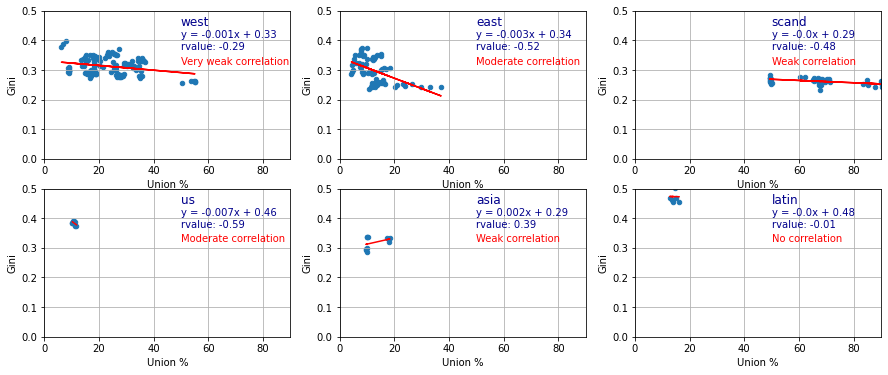

In [93]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

i = 0
for region in df:
#     x_position=df[region]["x"]
#     y_position=df[region]["y"]
    current_ax = ax[i // 3][i % 3]
    df[region]["df"].plot.scatter(x="Union %", y="Gini", ax=current_ax, grid=True)
#     ax[x_position][y_position].set_title(region)
    current_ax.set_ylim(0, 0.5)
    current_ax.set_xlim(0, 90)
    
    x = df[region]["df"]["Union %"]
    y = df[region]["df"]["Gini"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 3)}x + {round(intercept, 2)}"
    current_ax.plot(x, regress_values, "r-")
    
    current_ax.annotate(region, (50,0.45), fontsize=12, color="darkblue")
    current_ax.annotate(line_eq, (50,0.41), fontsize=10, color="darkblue")
    current_ax.annotate(f"rvalue: {round(rvalue,2)}", (50,0.37), fontsize=10, color="darkblue")
    
    correlation = "No correlation"
    if abs(rvalue) < 0.1:
        correlation = "No correlation"
    elif abs(rvalue) < 0.3:
        correlation = "Very weak correlation"
    elif abs(rvalue) < 0.5:
        correlation = "Weak correlation"
    elif abs(rvalue) < 0.7:
        correlation = "Moderate correlation"
    elif abs(rvalue) < 1:
        correlation = "Strong correlation"
    current_ax.annotate(correlation, (50,0.32), fontsize=10, color="red")    
    
    i += 1
    
    plt.savefig("output/regional_regression_udvgc.png")
    
    

## Assign colors to regions

In [103]:
data_working
data_working["Color"] = ""
data_working["Group"] = ""
data_working.head()

,Country,Year,Union %,Gini,CPI,Region,Color,Group
0,Hungary,2009,11.9,0.245,95.369304,East,,
1,Hungary,2015,9.0,0.291,111.384411,East,,
2,Poland,2009,16.3,0.305,97.484226,East,,
3,Poland,2010,18.3,0.307,100.000000,East,,
4,Poland,2011,17.0,0.304,104.239401,East,,


In [104]:

for index, row in data_working.iterrows():
    if row["Country"] in west: 
        data_working.loc[index,"Group"] = 10
        data_working.loc[index,"Color"] = "c"
    if row["Country"] in east: 
        data_working.loc[index,"Group"] = 50 
        data_working.loc[index,"Color"] = "m"
    if row["Country"] in scandinavian: 
        data_working.loc[index,"Group"] = 95
        data_working.loc[index,"Color"] = "y"
    if row["Country"] in us: 
        data_working.loc[index,"Group"] = 130 
        data_working.loc[index,"Color"] = "b"
    if row["Country"] in asia: 
        data_working.loc[index,"Group"] = 160
        data_working.loc[index,"Color"] = "g"
    if row["Country"] in latin: 
        data_working.loc[index,"Group"] = 190
        data_working.loc[index,"Color"] = "r"
data_working.head()
# data_working.plot.scatter(x="Union %", y="Gini", c="Group", colormap="viridis")

,Country,Year,Union %,Gini,CPI,Region,Color,Group
0,Hungary,2009,11.9,0.245,95.369304,East,m,50
1,Hungary,2015,9.0,0.291,111.384411,East,m,50
2,Poland,2009,16.3,0.305,97.484226,East,m,50
3,Poland,2010,18.3,0.307,100.000000,East,m,50
4,Poland,2011,17.0,0.304,104.239401,East,m,50


In [112]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

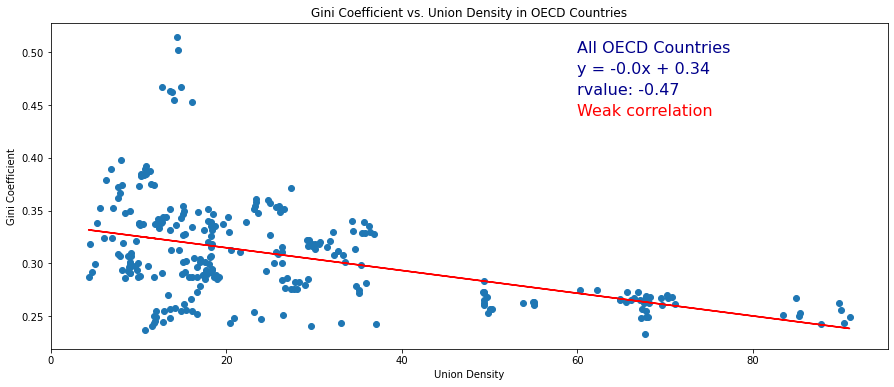

In [132]:
plt.figure(figsize=(15, 6))

x = data_working["Union %"]
y = data_working["Gini"]
plt.scatter(x, y,)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x, regress_values, "r-")
plt.xlabel("Union Density")
plt.ylabel("Gini Coefficient")
plt.title("Gini Coefficient vs. Union Density in OECD Countries")

plt.annotate("All OECD Countries", (60,0.5), fontsize=16, color="darkblue")
plt.annotate(line_eq, (60,0.48), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue,2)}", (60,0.46), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue) > 0.25:
    correlation = "Very weak correlation"
if abs(rvalue) > 0.3:
    correlation = "Weak correlation"
elif abs(rvalue) > 0.5:
    correlation = "Moderate correlation"
elif abs(rvalue) > 0.7:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.44), fontsize=16, color="red")    


plt.savefig("output/oecd_regression_udvgc.png")



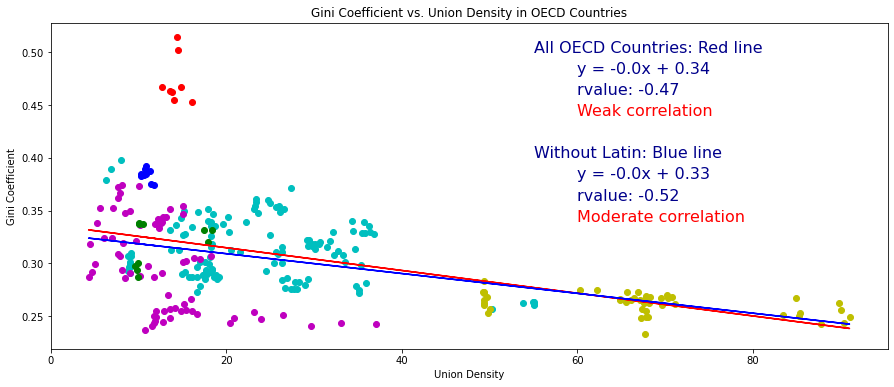

In [133]:
plt.figure(figsize=(15, 6))
i = 0
for region in df:
    x = df[region]["df"]["Union %"]
    y = df[region]["df"]["Gini"]
    plt.scatter(x, y, c=df[region]["color"] )
    #plt.annotate(f"{region}: {df[region]['color']}", (80, 0.5 - i*0.02), fontsize=16, color="darkblue"  )
    i += 1

x = data_working["Union %"]
y = data_working["Gini"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x, regress_values, "r-")
plt.xlabel("Union Density")
plt.ylabel("Gini Coefficient")
plt.title("Gini Coefficient vs. Union Density in OECD Countries")

plt.annotate("All OECD Countries: Red line", (55,0.5), fontsize=16, color="darkblue")
plt.annotate(line_eq, (60,0.48), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue,2)}", (60,0.46), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue) > 0.25:
    correlation = "Very weak correlation"
if abs(rvalue) > 0.3:
    correlation = "Weak correlation"
elif abs(rvalue) > 0.5:
    correlation = "Moderate correlation"
elif abs(rvalue) > 0.7:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.44), fontsize=16, color="red")    


data_working1 = data_working[data_working["Region"] != "Latin"]
x1 = data_working1["Union %"]
y1 = data_working1["Gini"]
(slope1, intercept1, rvalue1, pvalue1, stderr1) = st.linregress(x1, y1)
regress_values1 = x1 * slope1 + intercept1
line_eq1 = f"y = {round(slope1, 2)}x + {round(intercept1, 2)}"
plt.plot(x1, regress_values1, "b-")

plt.annotate("Without Latin: Blue line", (55,0.40), fontsize=16, color="darkblue")
plt.annotate(line_eq1, (60,0.38), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue1,2)}", (60,0.36), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue1) < 0.3:
    correlation = "Very weak correlation"
elif abs(rvalue1) < 0.5:
    correlation = "Weak correlation"
elif abs(rvalue1) < 0.7:
    correlation = "Moderate correlation"
elif abs(rvalue1) < 1:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.34), fontsize=16, color="red")
plt.savefig("output/oecd_regression_wo_latin.png")

In [124]:
def linear_regression(df, x_column, y_column, **kwargs):
    """
    df: dataframe
    x: string, column name
    y: string, column name
    """
    import matplotlib.pyplot as plt
    plt.figure(figsize=kwargs["figsize"]) if "figsize" in kwargs else plt.figure()
#     if not figsize:
#         plt.figure(figsize=figsize)
#     else:
#         plt.figure()
    x = df[x_column]
    y = df[y_column]
    plt.scatter(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.plot(x, regress_values, "r-")
    
    x_position = df[x_column].max()*0.75
    y_position = df[y_column].max()*0.9
    plt.annotate(line_eq, (x_position, y_position), fontsize=16, color="darkblue")
    plt.annotate(f"rvalue: {round(rvalue,2)}", (x_position, y_position*0.9), fontsize=16, color="darkblue")


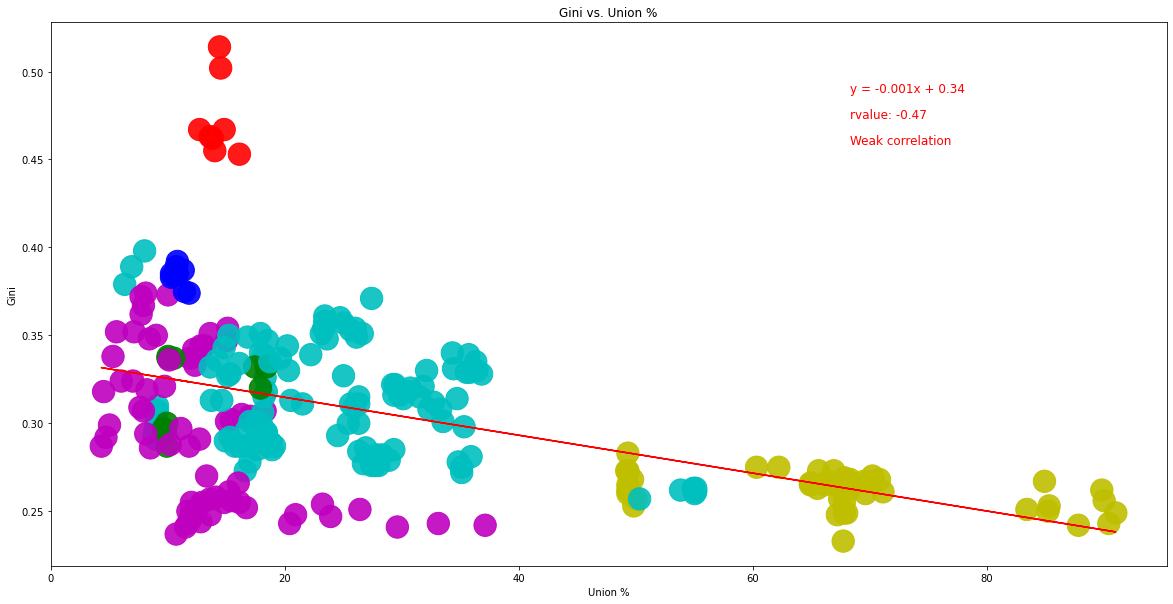

In [129]:
def linear_regression1(df, x_col, y_col, **kwargs):
    """
    df: dataframe
    x: string, column name
    y: string, column name
    """
    import matplotlib.pyplot as plt
    import scipy.stats as st

    plt.figure(figsize=kwargs["figsize"]) if "figsize" in kwargs else plt.figure()

    x = df[x_col]
    y = df[y_col]
    color = df["Color"]
    plt.scatter(x, y, s=500, c=color, alpha=0.9)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 3)}x + {round(intercept, 2)}"
    plt.plot(x, regress_values, "r-")

    xy = kwargs["xy"] if "xy" in kwargs else (x.max() * 0.75, y.max() * 0.95)
    fontsize = kwargs["fontsize"] if "fontsize" in kwargs else 12
    color = kwargs["color"] if "color" in kwargs else "red"
    plt.annotate(line_eq, xy, fontsize=fontsize, color=color)
    px, py = xy
    plt.annotate(f"rvalue: {round(rvalue, 2)}", (px, py * 0.97), fontsize=fontsize, color=color)
    correlation = "No correlation"
    if abs(rvalue) > 0.3:
        correlation = "Weak correlation"
    elif abs(ravlue) > 0.5:
        correlation = "Moderate correlation"
    elif abs(ravlue) > 0.7:
        correlation = "Strong correlation"
    plt.annotate(correlation, (px, py * 0.94), fontsize=fontsize, color=color)    
       
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs. {x_col}")

    
linear_regression1(data_working, x_col="Union %", y_col="Gini", figsize=(20,10))
plt.savefig("output/oecd_regression_w_latin.png")

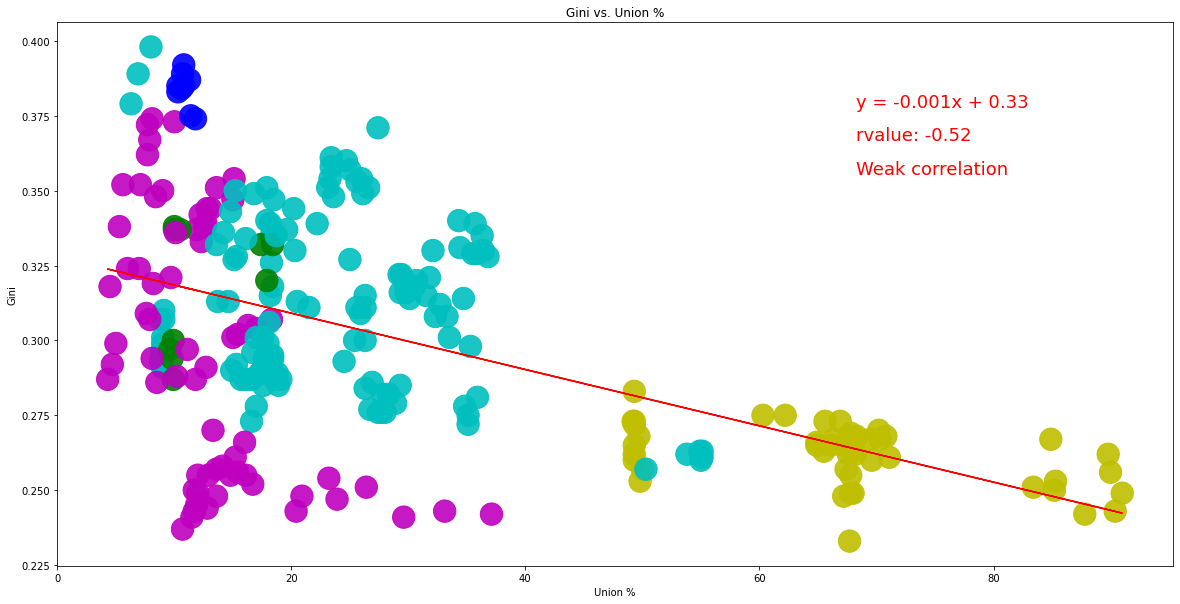

In [130]:
df1 = data_working[data_working["Region"] != "Latin"]
linear_regression1(df1, x_col="Union %", y_col="Gini", figsize=(20,10), fontsize=18)
plt.savefig("output/oecd_regression_wo_latin.png")